In [2]:
import pandas as pd
import numpy as np
import scipy.io
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Predicting sleep stage from SUA using RandomForests

On a dataset of 22 nights from 7 different mices, we extracted different features from the matlab dataset:

First step of pre-processing was to group SUA in 8 neurons group.

We then computed the features on the mean of each of theses groups.

In [3]:
mat = scipy.io.loadmat(r'C:\Users\MOBS\Desktop\datasetSUA5.mat')

In [4]:
data = pd.DataFrame(np.hstack((mat['X'], mat['Y'])))
data[pd.isnull(data)]=0

In [5]:
Y=data[162];
data.pop(162);

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3,random_state=12)

In [7]:
rf = RandomForestClassifier(n_estimators=1200)

In [8]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
preds=rf.predict(X_test.values)
confmat=confusion_matrix(y_test,preds)/np.sum(confusion_matrix(y_test,preds),axis=0)

In [10]:
accuracy_score(y_test,preds)

0.6087878787878788

## Predicting with 5 substages

First we try to predict on the 5 substages model: N1, N2, N3, REM, Wake

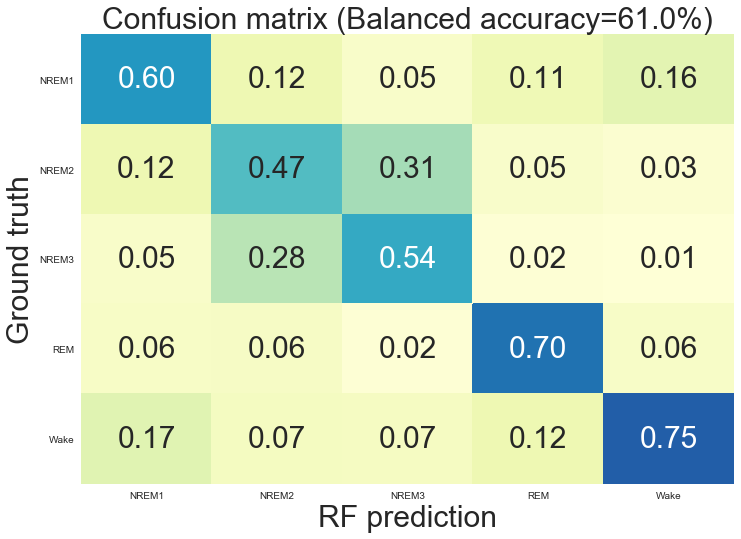

Text(0.5,1,'Relative importance of each neuron group')

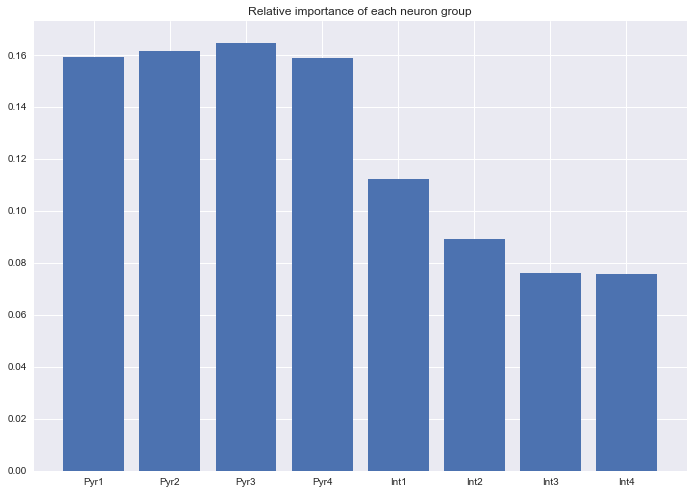

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27),'font.size': 30})
sns.heatmap(confmat,cmap="YlGnBu",annot=True, fmt=".2f",vmin=0, vmax=1,cbar=False,xticklabels=['NREM1','NREM2','NREM3','REM','Wake'],yticklabels=['NREM1','NREM2','NREM3','REM','Wake'])
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Ground truth',fontsize=30)
plt.xlabel('RF prediction',fontsize=30)
plt.title('Confusion matrix (Balanced accuracy='+str(sum(np.diag(confmat))/5//0.01)+'%)',fontsize=30)
plt.show()
est=rf
relativeNeuronsFeatures=np.zeros(8)
for i in range(0,8):
    relativeNeuronsFeatures[i]=sum(est.feature_importances_[range(i*20,i*20+20)])
plt.bar(range(0,8),relativeNeuronsFeatures);
plt.xticks(range(0,8),('Pyr1','Pyr2','Pyr3','Pyr4','Int1','Int2','Int3','Int4'));
plt.title('Relative importance of each neuron group')


Text(0.5,1,'Relative importance of each feature')

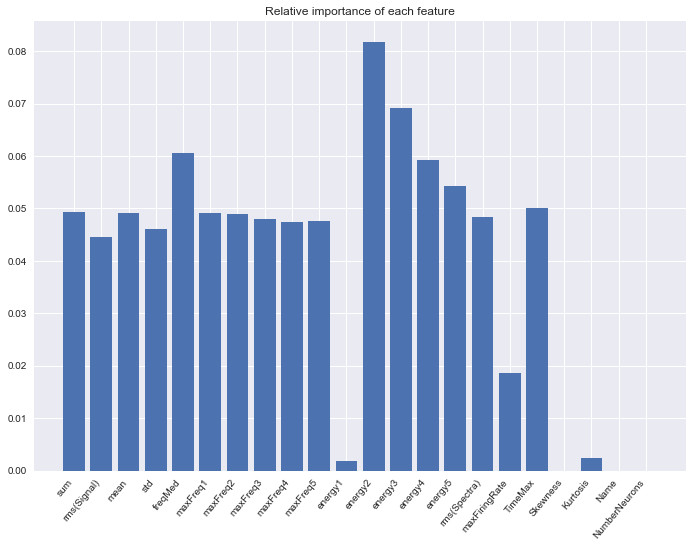

In [12]:
relativeFeaturesImportance=np.zeros(22)
for i in range(0,20):
    relativeFeaturesImportance[i]=sum(est.feature_importances_[range(i,20*8+i,20)])
relativeFeaturesImportance[18]=est.feature_importances_[160]
relativeFeaturesImportance[19]=est.feature_importances_[161]
plt.bar(range(0,22),relativeFeaturesImportance);
plt.xticks(range(0,22),('sum','rms(Signal)','mean','std','freqMed','maxFreq1','maxFreq2','maxFreq3','maxFreq4','maxFreq5','energy1','energy2','energy3','energy4','energy5','rms(Spectra)','maxFiringRate','TimeMax','Skewness','Kurtosis','Name','NumberNeurons'),rotation=50,horizontalalignment='right');
plt.title('Relative importance of each feature')

## Predicting on 3 substages 
To improve accuracy, we'll now try to predict on a 3 substages model: NREM, REM and Wake

In [13]:
Ynrem=Y.copy()
Ynrem[Y.isin([1,2,3])]=1
dataNREMStates=data[Y.isin([1,2,3])]
YnremStates=Y.copy()
YnremStates=YnremStates[Y.isin([1,2,3])]
X_train, X_test, y_train, y_test = train_test_split(data, Ynrem, test_size=0.3,random_state=12)

In [14]:
rf = RandomForestClassifier()
params=[{'n_estimators':[1200],'criterion':['gini']}]
gs=GridSearchCV(rf,params)
gs.fit(X_train,y_train)
preds=gs.predict(X_test.values)
confmat=confusion_matrix(y_test,preds)/np.sum(confusion_matrix(y_test,preds),axis=0)

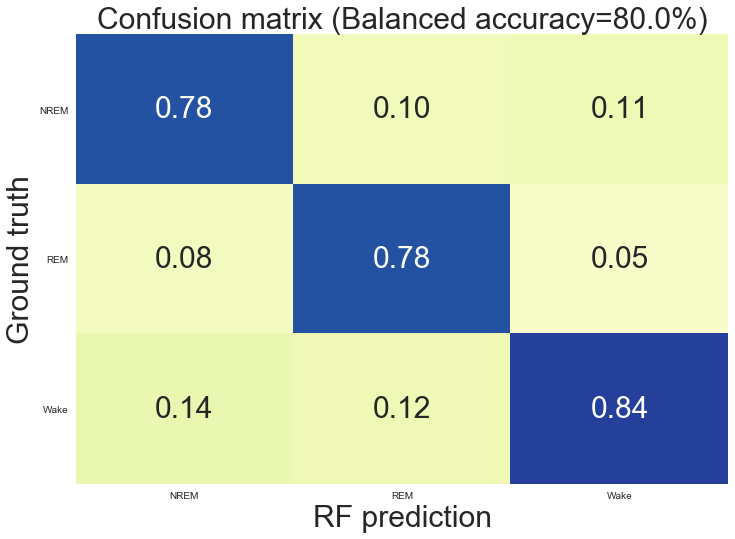

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27),'font.size': 30})
ax=sns.heatmap(confmat,cmap="YlGnBu",annot=True, fmt=".2f",vmin=0, vmax=1,cbar=False,xticklabels=['NREM','REM','Wake'],yticklabels=['NREM','REM','Wake'])
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.ylabel('Ground truth',fontsize=30)
plt.xlabel('RF prediction',fontsize=30)
plt.title('Confusion matrix (Balanced accuracy='+str(sum(np.diag(confmat))/3//0.01)+'%)',fontsize=30)
plt.show()

Text(0.5,1,'Relative importance of each neuron group')

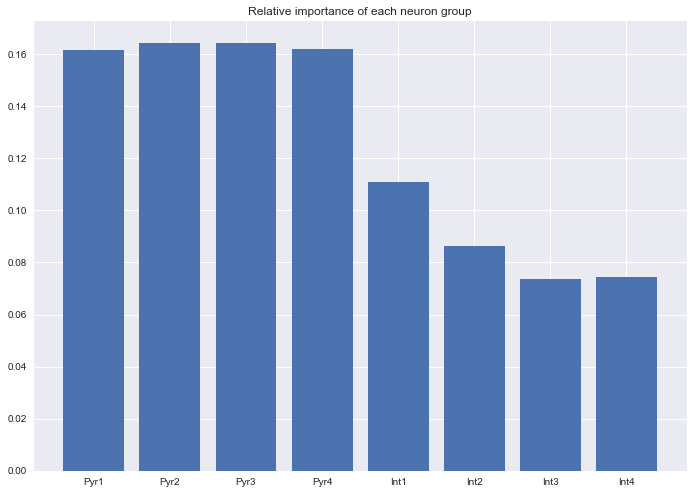

In [16]:
est=gs.best_estimator_
relativeNeuronsFeatures=np.zeros(8)
for i in range(0,8):
    relativeNeuronsFeatures[i]=sum(est.feature_importances_[range(i*20,i*20+20)])
plt.bar(range(0,8),relativeNeuronsFeatures);
plt.xticks(range(0,8),('Pyr1','Pyr2','Pyr3','Pyr4','Int1','Int2','Int3','Int4'));
plt.title('Relative importance of each neuron group')


Text(0.5,1,'Relative importance of each feature')

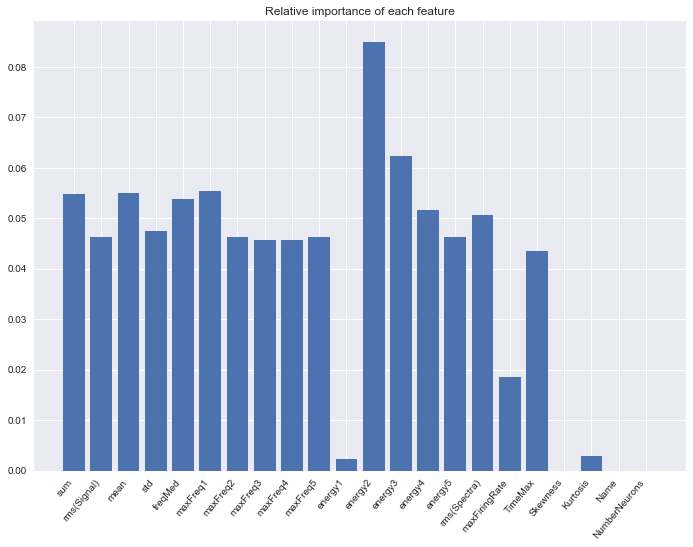

In [17]:
relativeFeaturesImportance=np.zeros(22)
for i in range(0,20):
    relativeFeaturesImportance[i]=sum(est.feature_importances_[range(i,20*8+i,20)])
relativeFeaturesImportance[18]=est.feature_importances_[160]
relativeFeaturesImportance[19]=est.feature_importances_[161]
plt.bar(range(0,22),relativeFeaturesImportance);
plt.xticks(range(0,22),('sum','rms(Signal)','mean','std','freqMed','maxFreq1','maxFreq2','maxFreq3','maxFreq4','maxFreq5','energy1','energy2','energy3','energy4','energy5','rms(Spectra)','maxFiringRate','TimeMax','Skewness','Kurtosis','Name','NumberNeurons'),rotation=50,horizontalalignment='right');
plt.title('Relative importance of each feature')

## Predicting NREM Substages

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dataNREMStates, YnremStates, test_size=0.2)


In [19]:
rf = RandomForestClassifier(n_estimators=1200)

In [20]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
preds=rf.predict(X_test.values)
confusion_matrix(y_test,preds)/np.sum(confusion_matrix(y_test,preds),axis=0)

array([[0.75942179, 0.16122159, 0.05684755],
       [0.17811048, 0.5390625 , 0.32868217],
       [0.06246773, 0.29971591, 0.61447028]])

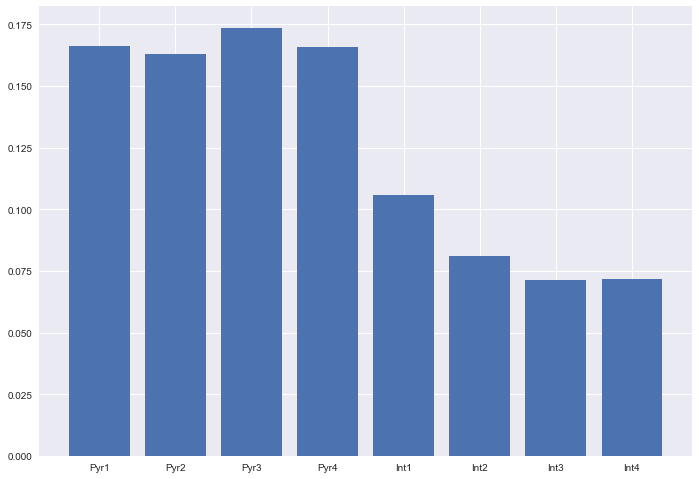

In [22]:
est=rf
relativeNeuronsFeatures=np.zeros(8)
for i in range(0,8):
    relativeNeuronsFeatures[i]=sum(est.feature_importances_[range(i*20,i*20+20)])
plt.bar(range(0,8),relativeNeuronsFeatures);
plt.xticks(range(0,8),('Pyr1','Pyr2','Pyr3','Pyr4','Int1','Int2','Int3','Int4'));

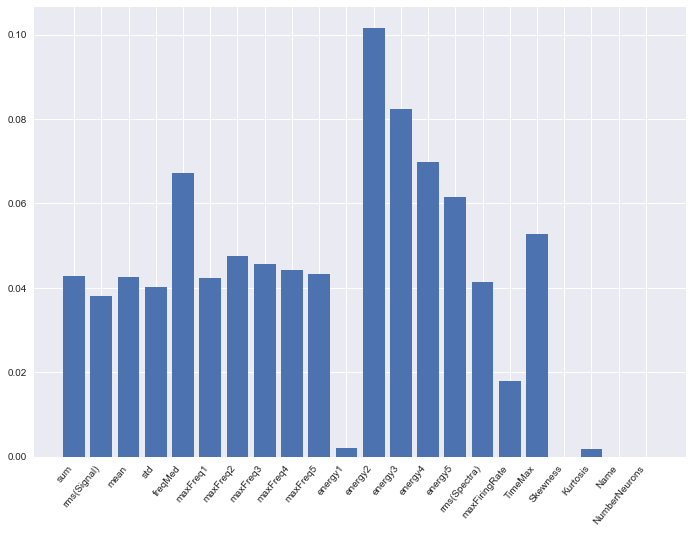

In [23]:
relativeFeaturesImportance=np.zeros(22)
for i in range(0,20):
    relativeFeaturesImportance[i]=sum(est.feature_importances_[range(i,20*8+i,20)])
relativeFeaturesImportance[18]=est.feature_importances_[160]
relativeFeaturesImportance[19]=est.feature_importances_[161]
plt.bar(range(0,22),relativeFeaturesImportance);
plt.xticks(range(0,22),('sum','rms(Signal)','mean','std','freqMed','maxFreq1','maxFreq2','maxFreq3','maxFreq4','maxFreq5','energy1','energy2','energy3','energy4','energy5','rms(Spectra)','maxFiringRate','TimeMax','Skewness','Kurtosis','Name','NumberNeurons'),rotation=50,horizontalalignment='right');
